回帰

## 必要なライブラリのimport

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import pickle

In [2]:
# 予測したいデータの読み込み
path_test_preprp = '../../../../data/processed/test_processed_30.csv'

test = pd.read_csv(path_test_preprp)

## 保存されたモデルを使って予測を行う

In [3]:
n_folds = 5
predictions = np.zeros(len(test))
features = [c for c in test.columns if c not in ['card_id',]]
#categorical_feats = ['feature_1','feature_2', 'feature_3','hist_merchant_category_nu','hist_merchant_category_mode','hist_city_nu','hist_city_mode','hist_state_nu','hist_state_mode','hist_category_1_mod','hist_category_2_mod','hist_category_3_mod','new_merchant_category_nu','new_merchant_category_mode','new_city_nu','new_city_mode','new_state_nu','new_state_mode','new_category_1_mod','new_category_2_mod','new_category_3_mod']


for fold_ in range(n_folds):
    # モデルを読み込む
    with open(f'../src/models/lgb_30/model_fold_{fold_}.pkl', 'rb') as f:
        clf = pickle.load(f)
    # モデルで予測を行う
    fold_predictions = clf.predict(test[features])
    # 予測結果を足し合わせる
    predictions += fold_predictions

# 平均を取る
predictions /= n_folds

# RMSEを計算する（テストデータに対して真の値がある場合）
# y_testが存在する場合に限り
if 'y_test' in locals():
    score = mean_squared_error(y_test, predictions, squared=False)
    print(f'RMSE={score}')

In [4]:
# 予測結果を出力する
print(predictions)

[-1.96480782 -0.18782716 -0.53779798 ...  0.970314   -2.49987748
  0.05197468]


## 提出用ファイルの作成

In [5]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("../submit_oshikiri_30.csv", index=False)

(array([1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00,
        3.0000e+00, 1.0000e+00, 4.0000e+00, 5.0000e+00, 6.0000e+00,
        3.0000e+00, 4.0000e+00, 3.0000e+00, 3.0000e+00, 4.0000e+00,
        1.1000e+01, 9.0000e+00, 5.0000e+00, 8.0000e+00, 9.0000e+00,
        9.0000e+00, 8.0000e+00, 5.0000e+00, 1.0000e+01, 1.2000e+01,
        1.4000e+01, 1.8000e+01, 2.6000e+01, 2.2000e+01, 2.6000e+01,
        1.5000e+01, 1.8000e+01, 3.0000e+01, 1.5000e+01, 1.9000e+01,
        2.3000e+01, 3.1000e+01, 2.2000e+01, 2.2000e+01, 2.8000e+01,
        2.6000e+01, 3.8000e+01, 3.2000e+01, 4.4000e+01, 2.7000e+01,
        3.7000e+01, 5.4000e+01, 5.0000e+01, 7.4000e+01, 5.6000e+01,
        7.3000e+01, 7.7000e+01, 9.3000e+01, 8.1000e+01, 9.0000e+01,
        1.1100e+02, 1.1200e+02, 1.2600e+02, 1.5400e+02, 1.5400e+02,
        1.8400e+02, 2.1000e+02, 2.6700e+02, 3.1500e+02, 3.3100e+02,
        4.2200e+02, 5.0600e+02, 6.3100e+02, 7.0000e+02, 8.4600e+02,
        1.0630e+03, 1.2910e+03, 1.6480e+03, 2.08

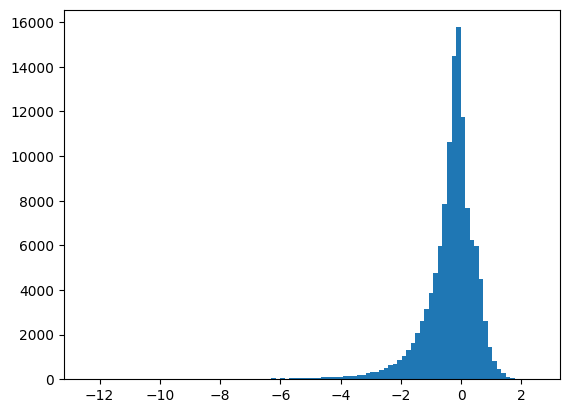

In [7]:
import matplotlib.pyplot as plt
#plt.yscale('log')
plt.hist(sub_df.target, bins=100)
#plt.hist(predictions[predictions<0], bins=100)

In [19]:
sub_df

,card_id,target
0,C_ID_0ab67a22ab,-2.072153
1,C_ID_130fd0cbdd,-0.191818
2,C_ID_b709037bc5,-0.591274
3,C_ID_d27d835a9f,-0.176060
4,C_ID_2b5e3df5c2,-0.980048
...,...,...
123618,C_ID_7a239d2eda,0.800503
123619,C_ID_75ace375ae,-0.307557
123620,C_ID_21d56d950c,1.001854
123621,C_ID_6c46fc5a9d,-2.995060


In [10]:
test

,first_active_month,card_id,feature_1,feature_2,feature_3,elapsed_time,quarter,days_feature1,days_feature2,days_feature3,...,total_duration_min,total_duration_max,total_duration_mean,total_amount_month_ratio_min,total_amount_month_ratio_max,total_amount_month_ratio_mean,total_duration,ratio_amount_total,ratio_amount_mean,ratio_merchant_category_nu
0,1978,C_ID_0ab67a22ab,3,3,1,306,2,918,918,306,...,158.0,51666.0,7779.549296,0.025316,8.278481,1.250920,330,0.045998,1.042612,0.187500
1,1888,C_ID_130fd0cbdd,2,3,0,396,1,792,1188,0,...,308.0,54593.0,5825.022989,0.051948,9.207792,0.982607,462,0.085422,0.740325,0.500000
2,2100,C_ID_b709037bc5,5,1,1,184,3,920,184,184,...,1155.0,167706.0,54367.133333,0.194805,28.285714,9.169697,199,0.117430,0.763294,0.250000
3,2222,C_ID_d27d835a9f,2,1,0,62,4,124,62,0,...,770.0,42812.0,10590.388889,0.129870,7.220779,1.793936,134,0.300996,0.782590,0.555556
4,1491,C_ID_2b5e3df5c2,5,1,1,793,4,3965,793,793,...,0.0,847000.0,54698.353448,0.000000,142.857143,9.229007,464,0.154201,2.827010,0.161290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123618,2161,C_ID_7a239d2eda,2,2,0,123,4,246,246,0,...,770.0,11172.0,3575.301370,0.129870,1.934211,0.607829,134,0.000000,0.000000,0.000000
123619,2131,C_ID_75ace375ae,3,1,1,153,3,459,153,153,...,308.0,10780.0,2995.363636,0.051948,1.818182,0.505422,206,1.047847,1.833732,1.000000
123620,1766,C_ID_21d56d950c,5,1,1,518,3,2590,518,518,...,2464.0,123585.0,29135.972973,0.415584,20.844156,4.922341,305,0.000000,0.000000,0.000000
123621,2039,C_ID_6c46fc5a9d,2,1,0,245,2,490,245,0,...,486.0,34020.0,6241.794118,0.074074,5.185185,0.953531,177,0.097719,1.009765,0.333333
